# Transefer data


In [1]:
from google.colab import files
uploaded = files.upload()

Saving HeartDisease.csv to HeartDisease.csv




# Membuat Model Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Evaluasi Model:
Akurasi: 0.56
Presisi (Makro): 0.21
Recall (Makro): 0.23
F1-Score (Makro): 0.21
AUC-ROC (OvR): 0.76


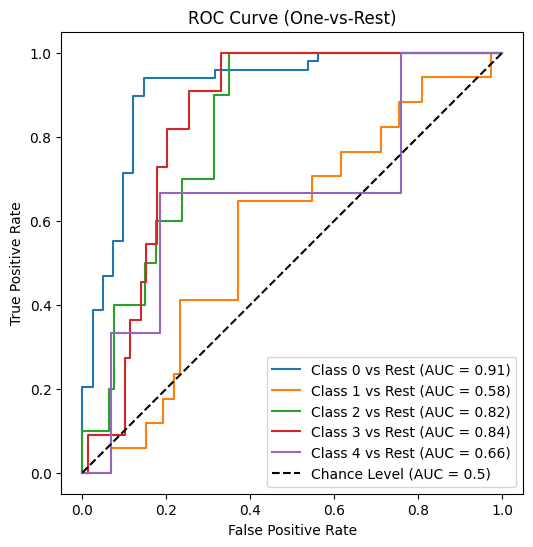

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    RocCurveDisplay
)
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# 1. Load Data dan Handling Missing Values
data = pd.read_csv('HeartDisease.csv').replace('?', np.nan).dropna()

# 2. Pisahkan Fitur dan Target
X = data.drop('num', axis=1)
y = data['num'].astype(int)  # Pastikan tipe data integer

# 3. Bagi Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. Bangun Model (Multi-class)
model = LogisticRegression(
    max_iter=1000,
    multi_class='ovr',  # One-vs-Rest untuk multi-class
    solver='liblinear'
)
model.fit(X_train, y_train)

# 5. Prediksi
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# 6. Hitung Metrik Evaluasi
# Konversi target ke format biner untuk AUC-ROC (One-vs-Rest)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

print("Evaluasi Model:")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
print(f"Presisi (Makro): {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"Recall (Makro): {recall_score(y_test, y_pred, average='macro'):.2f}")
print(f"F1-Score (Makro): {f1_score(y_test, y_pred, average='macro'):.2f}")
print(f"AUC-ROC (OvR): {roc_auc_score(y_test_bin, y_proba, multi_class='ovr'):.2f}")

# 7. Plot ROC Curve (One-vs-Rest)
fig, ax = plt.subplots(figsize=(8, 6))
for class_id in range(len(model.classes_)):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, class_id],
        y_proba[:, class_id],
        name=f"Class {class_id} vs Rest",
        ax=ax
    )
plt.plot([0, 1], [0, 1], "k--", label="Chance Level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend()
plt.show()

1. Logistic Regression untuk Multi-Kelas
Logistic Regression adalah model yang digunakan untuk memprediksi probabilitas suatu instance termasuk dalam kelas tertentu. Untuk kasus multi-kelas (lebih dari 2 kelas), digunakan strategi One-vs-Rest (OvR). Strategi ini bekerja dengan:

Membuat satu model biner untuk setiap kelas.

Setiap model memprediksi apakah suatu instance termasuk dalam kelas tersebut atau bukan.

Probabilitas akhir dihitung untuk setiap kelas, dan instance diklasifikasikan ke kelas dengan probabilitas tertinggi.

2. Akurasi
Akurasi mengukur seberapa sering model membuat prediksi yang benar. Ini dihitung dengan membagi jumlah prediksi benar (baik positif maupun negatif) dengan total jumlah prediksi. Semakin tinggi akurasi, semakin baik performa model.

3. Presisi (Makro)
Presisi mengukur seberapa akurat model dalam memprediksi kelas positif. Untuk kasus multi-kelas, presisi dihitung untuk setiap kelas secara terpisah, kemudian diambil rata-ratanya (makro). Presisi tinggi berarti model jarang salah memprediksi instance sebagai positif ketika sebenarnya negatif.

4. Recall (Makro)
Recall mengukur seberapa baik model dapat menemukan semua instance positif. Untuk multi-kelas, recall dihitung untuk setiap kelas, kemudian diambil rata-ratanya (makro). Recall tinggi berarti model dapat menemukan sebagian besar instance positif tanpa banyak yang terlewat.

5. F1-Score (Makro)
F1-Score adalah metrik yang menggabungkan presisi dan recall. Ini adalah rata-rata harmonik dari kedua metrik tersebut. F1-Score berguna ketika kita ingin menyeimbangkan antara presisi dan recall. Untuk multi-kelas, F1-Score dihitung untuk setiap kelas, kemudian diambil rata-ratanya (makro).

6. AUC-ROC (One-vs-Rest)
AUC-ROC (Area Under the Receiver Operating Characteristic Curve) mengukur seberapa baik model dapat membedakan antara kelas. Untuk multi-kelas, AUC dihitung untuk setiap kelas menggunakan strategi One-vs-Rest (OvR), kemudian diambil rata-ratanya. AUC mendekati 1 menunjukkan model yang sangat baik, sedangkan AUC mendekati 0.5 menunjukkan model yang tidak lebih baik dari tebakan acak.

7. ROC Curve
ROC Curve adalah grafik yang memplot True Positive Rate (TPR) terhadap False Positive Rate (FPR) pada berbagai threshold. Kurva ini membantu memvisualisasikan trade-off antara kemampuan model untuk menemukan instance positif (TPR) dan kesalahan memprediksi instance negatif sebagai positif (FPR). Semakin kurva mendekati sudut kiri atas, semakin baik performa model.

Dengan penjelasan ini, kita dapat memahami bagaimana Logistic Regression bekerja untuk kasus multi-kelas dan bagaimana metrik evaluasi digunakan untuk mengukur performa model.